# FINAL PROJECT: 

KELOMPOK 4 :
- Jonathan Adiwinata
- Melin Febriani

## Introduction

Kartu kredit adalah kartu yang biasanya memberikan akses ke jumlah kredit yang dapat digunakan untuk melakukan pembayaran dan memanfaatkan layanan. Jumlah kredit ini memiliki waktu pembayaran di mana jumlah tersebut harus dilunasi. Kelebihan dari kartu kredit adalah  menawarkan hadiah dalam bentuk cashback atau poin. Kartu kredit dikeluarkan oleh bank atau pemberi pinjaman kredit jenis apa pun. Dalam proyek ini, telah diberikan data ekstensif tentang nasabah bank selama 6 bulan terakhir yang mencakup frekuensi transaksi, jumlah, jangka waktu... dll. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan dan 18 atribut. Data ini akan digunakan untuk meluncurkan kampanye iklan pemasaran bertarget yang disesuaikan dengan kelompok pelanggan tertentu. Oleh sebab itu dalam proyek ini akan dilakukan clustering untuk membagi nasabahnya menjadi setidaknya 3 kelompok berbeda. Untuk memaksimalkan tingkat Segmentasi pemasaran akan dilakukan clustering dengan menggunakan 3 metode yaitu K-Means, DBSCan dan Hierarchical Clustering 

## Import Libraries

Install dan import libraries yang digunakan.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings("ignore")

In [3]:
mpl.style.use(['ggplot'])

## Data Loading

In [4]:
 data = pd.read_csv('C:/Kuliah/Studi Independen/CC GENERAL.csv')
#data = pd.read_csv('E:/Cool Yeah/Hacktiv8/Final-Project_Kelompok4/Data/CC_GENERAL.csv')

Memanggil bagian kepala data.

In [5]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Memanggil bagian ekor data.

In [6]:
data.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

Mengecek dimensi data.

In [7]:
data.shape

(8950, 18)

Dari hasil diatas terdapat 8.950 baris data dan 18 kolom data

Mengecek info dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Mengecek tipe data apa saja yg ada pada variabel.

In [9]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Terdapat 3 variabel bertipe integer dan 14 variabel bertipe float

Statistik Deskriptif.

In [10]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

Mengecek atribut data.

In [11]:
data.TENURE.value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

## Data Cleaning

Mengecek jumlah data yang memiliki duplicate.

In [12]:
data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [13]:
data.duplicated().value_counts()

False    8950
dtype: int64

### Mengisi Missing Value

In [14]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Pada data terdapat missing value pada variabel 'Minimum_Payment' sebanyak 313 dan 'Credit_Limit' sebanyak 1

In [15]:
data[data['MINIMUM_PAYMENTS'].isna()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [16]:
#Mengisi mising value dengan nilai mean
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()

data.loc[(data['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()

data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

sudah tidak terdapat data yang missing value

In [17]:
data.drop('CUST_ID', axis=1, inplace=True)

In [18]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Data Exploration

In [19]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

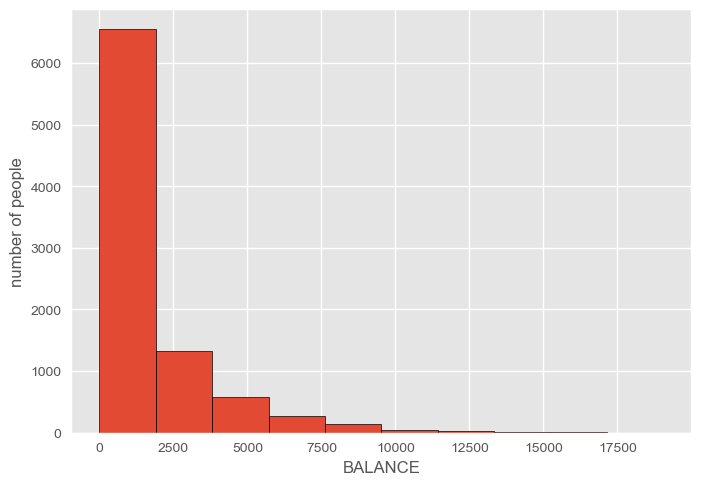

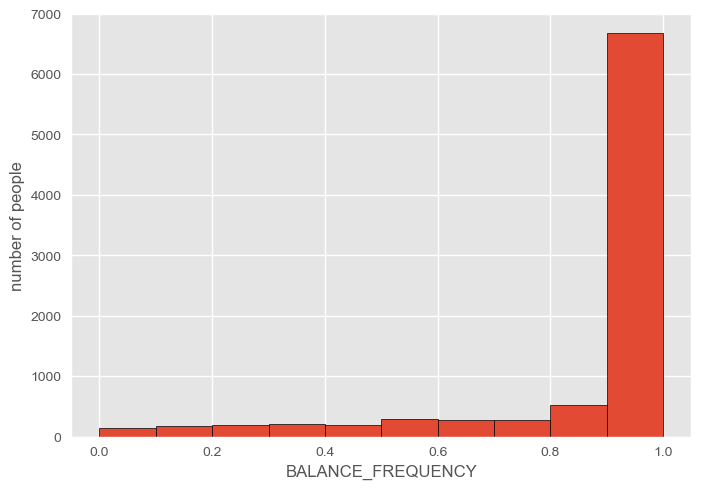

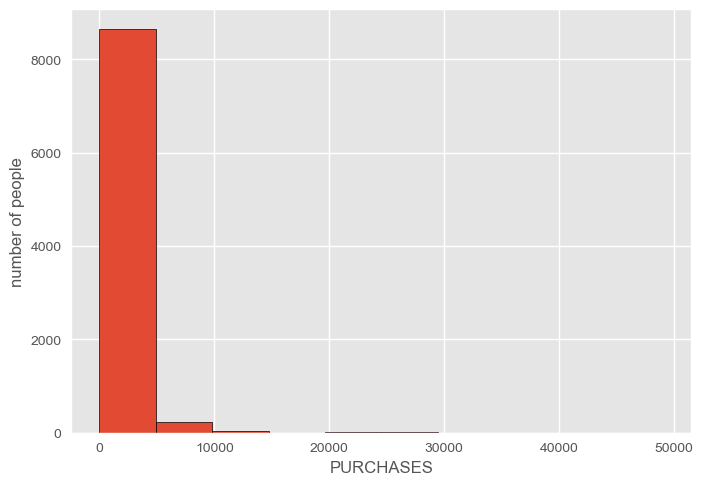

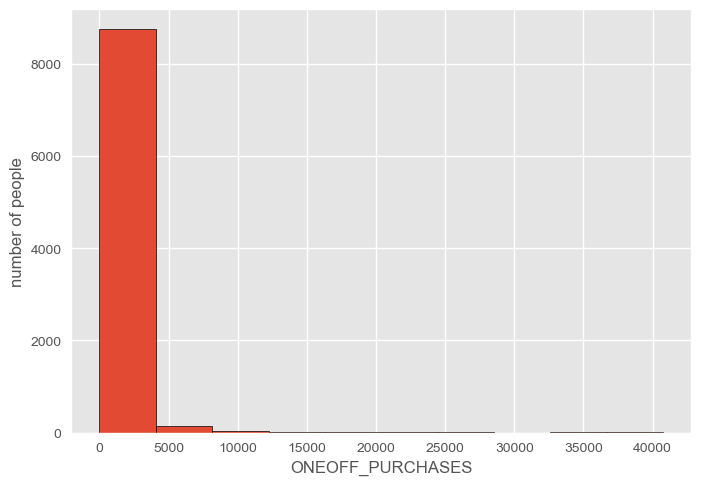

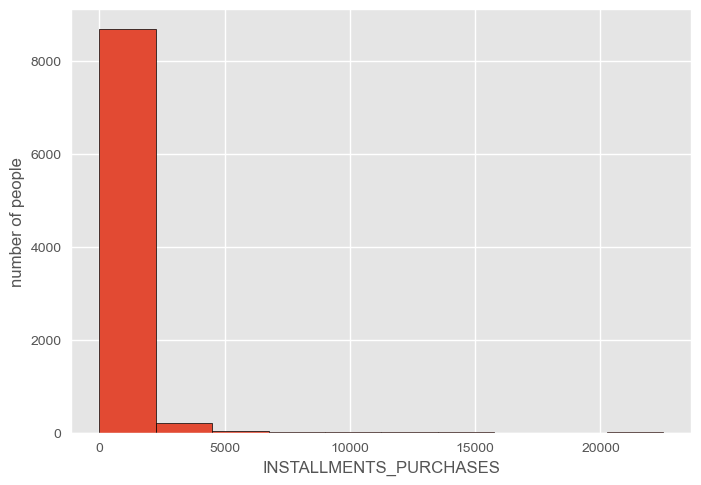

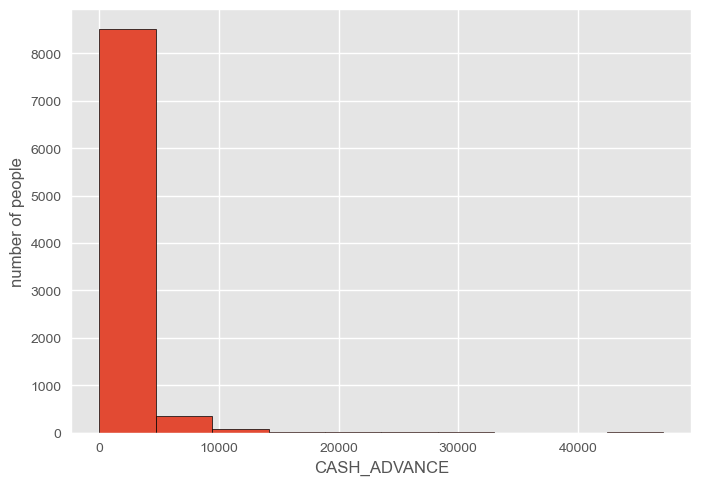

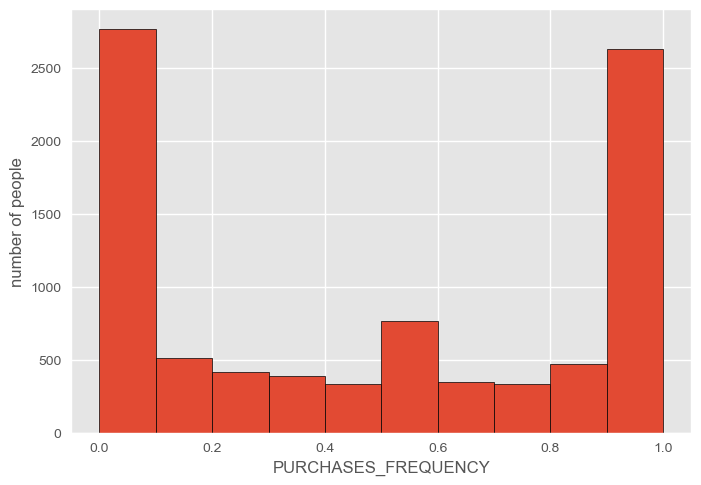

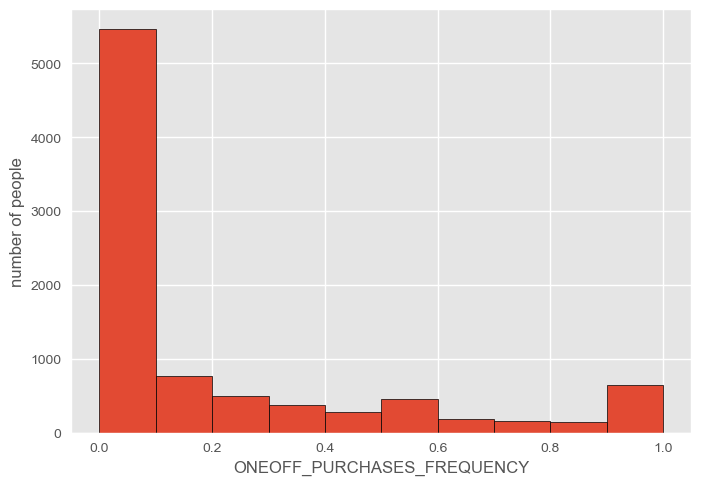

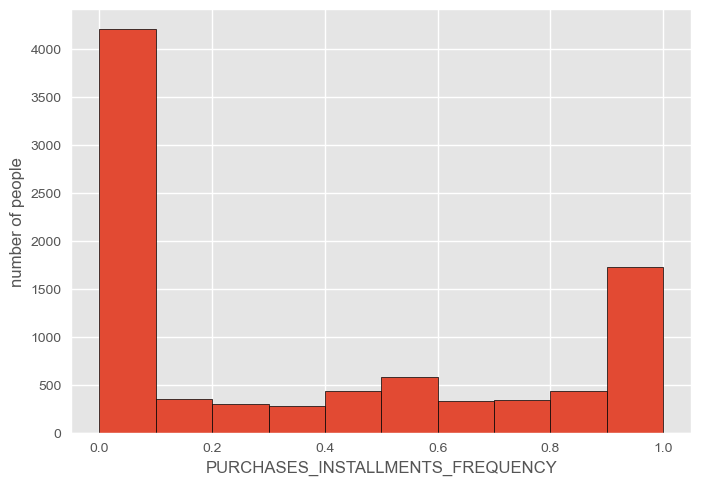

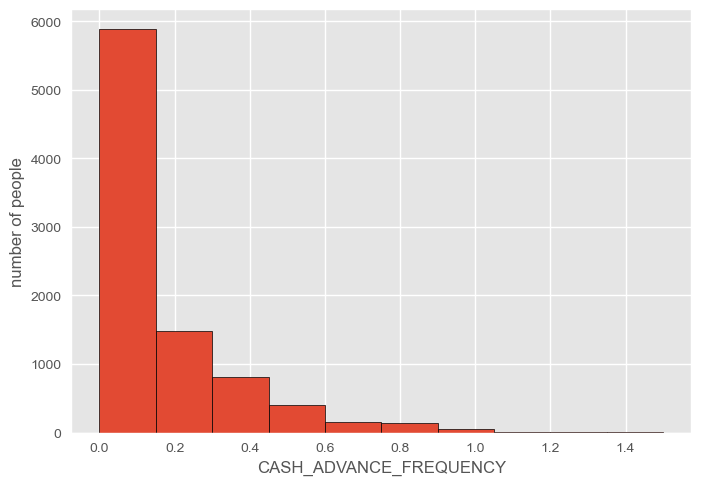

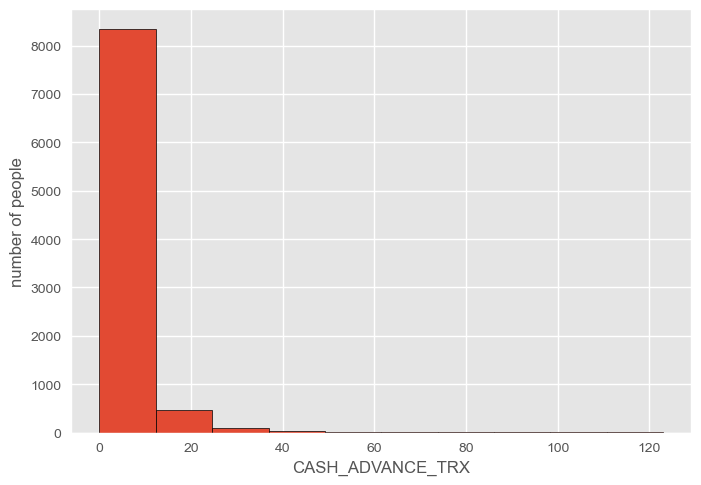

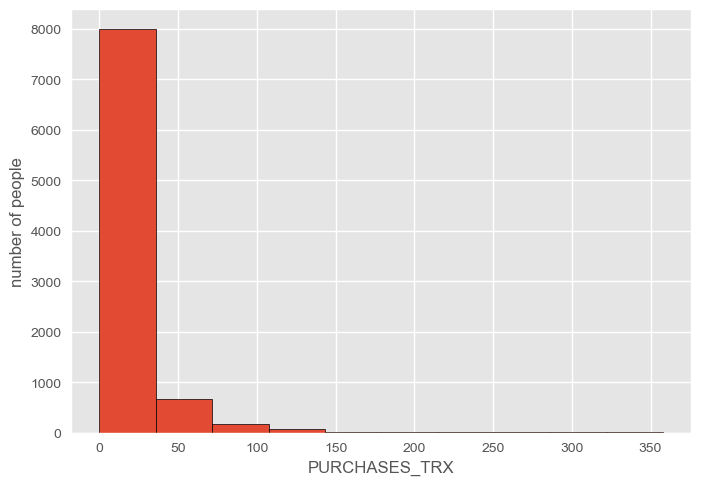

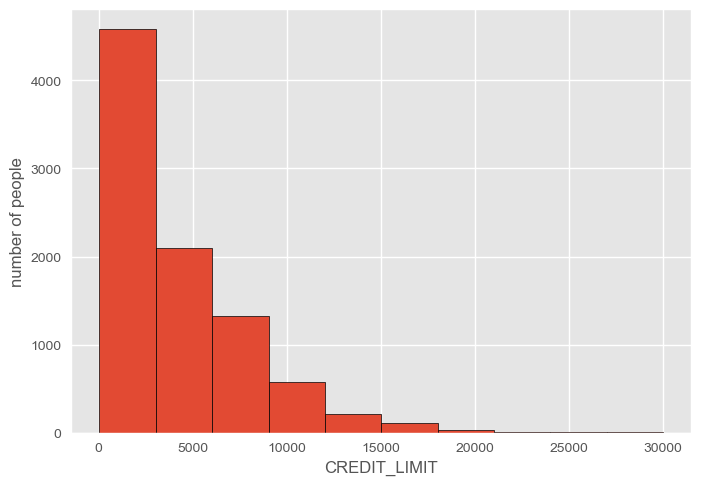

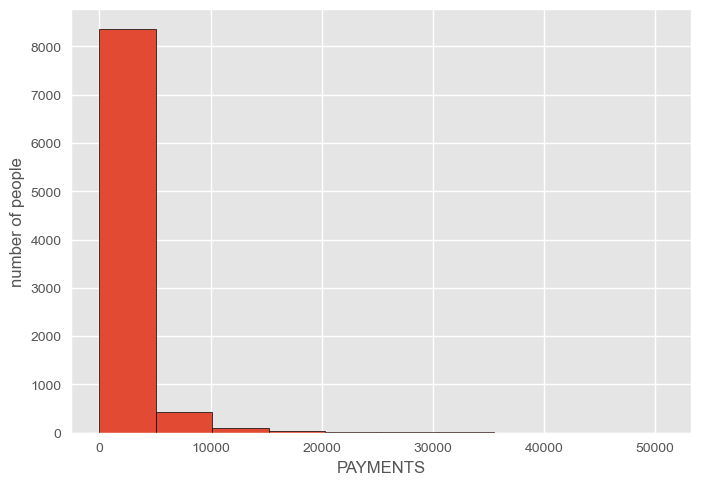

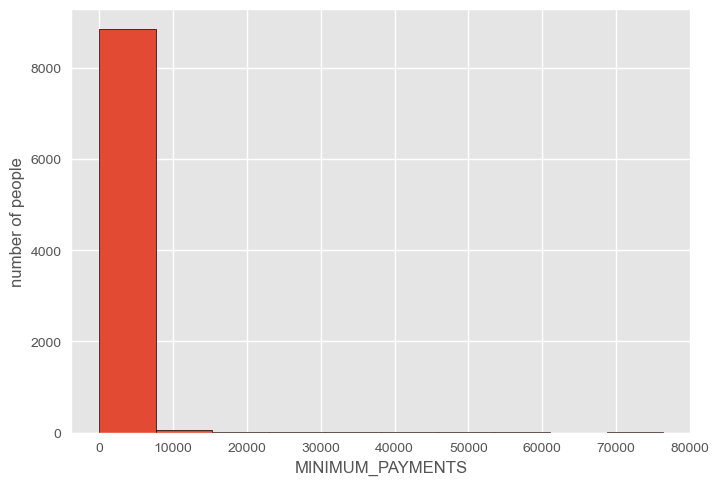

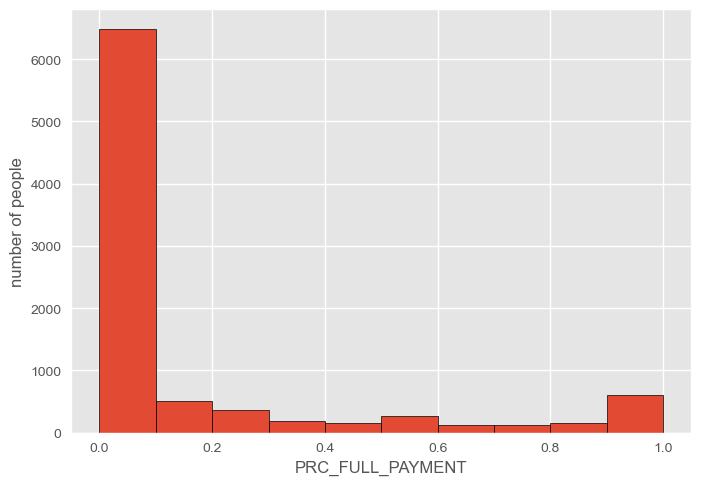

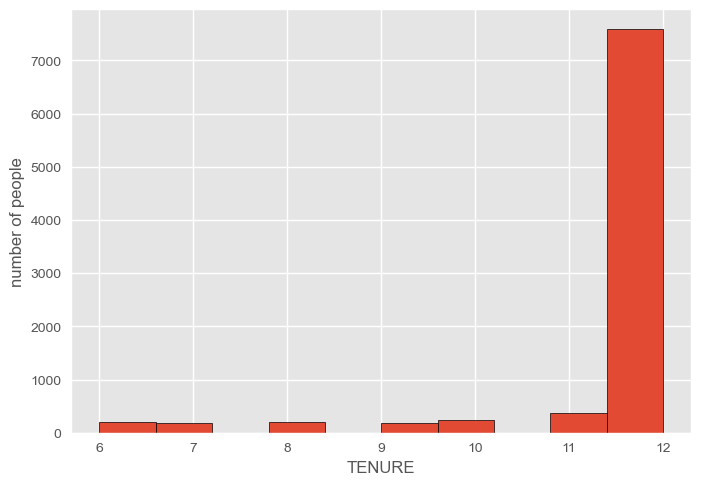

In [20]:
#histograms of all columns except cust_id
for i in data.loc[:, data.columns != 'CUST_ID']:
    plt.hist(data[i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

Dari hasil output diatas, dapat disimpulkan bahwa sebagian besar distribusinya lebih cenderung ke kiri. Dapat dilihat juga saat menggunakan kartu kredit, sebagian besar nasabah kartu kredit lebih memilih tenor 12 bulan dibandingkan opsi tenor lainnya. Hal ini dapat disimpulkan bahwa nasabah lebih cenderung membayar kredit dalam jangka panjang dengan konsekuensi tingkat bunga yang lebih tinggi.

<AxesSubplot:>

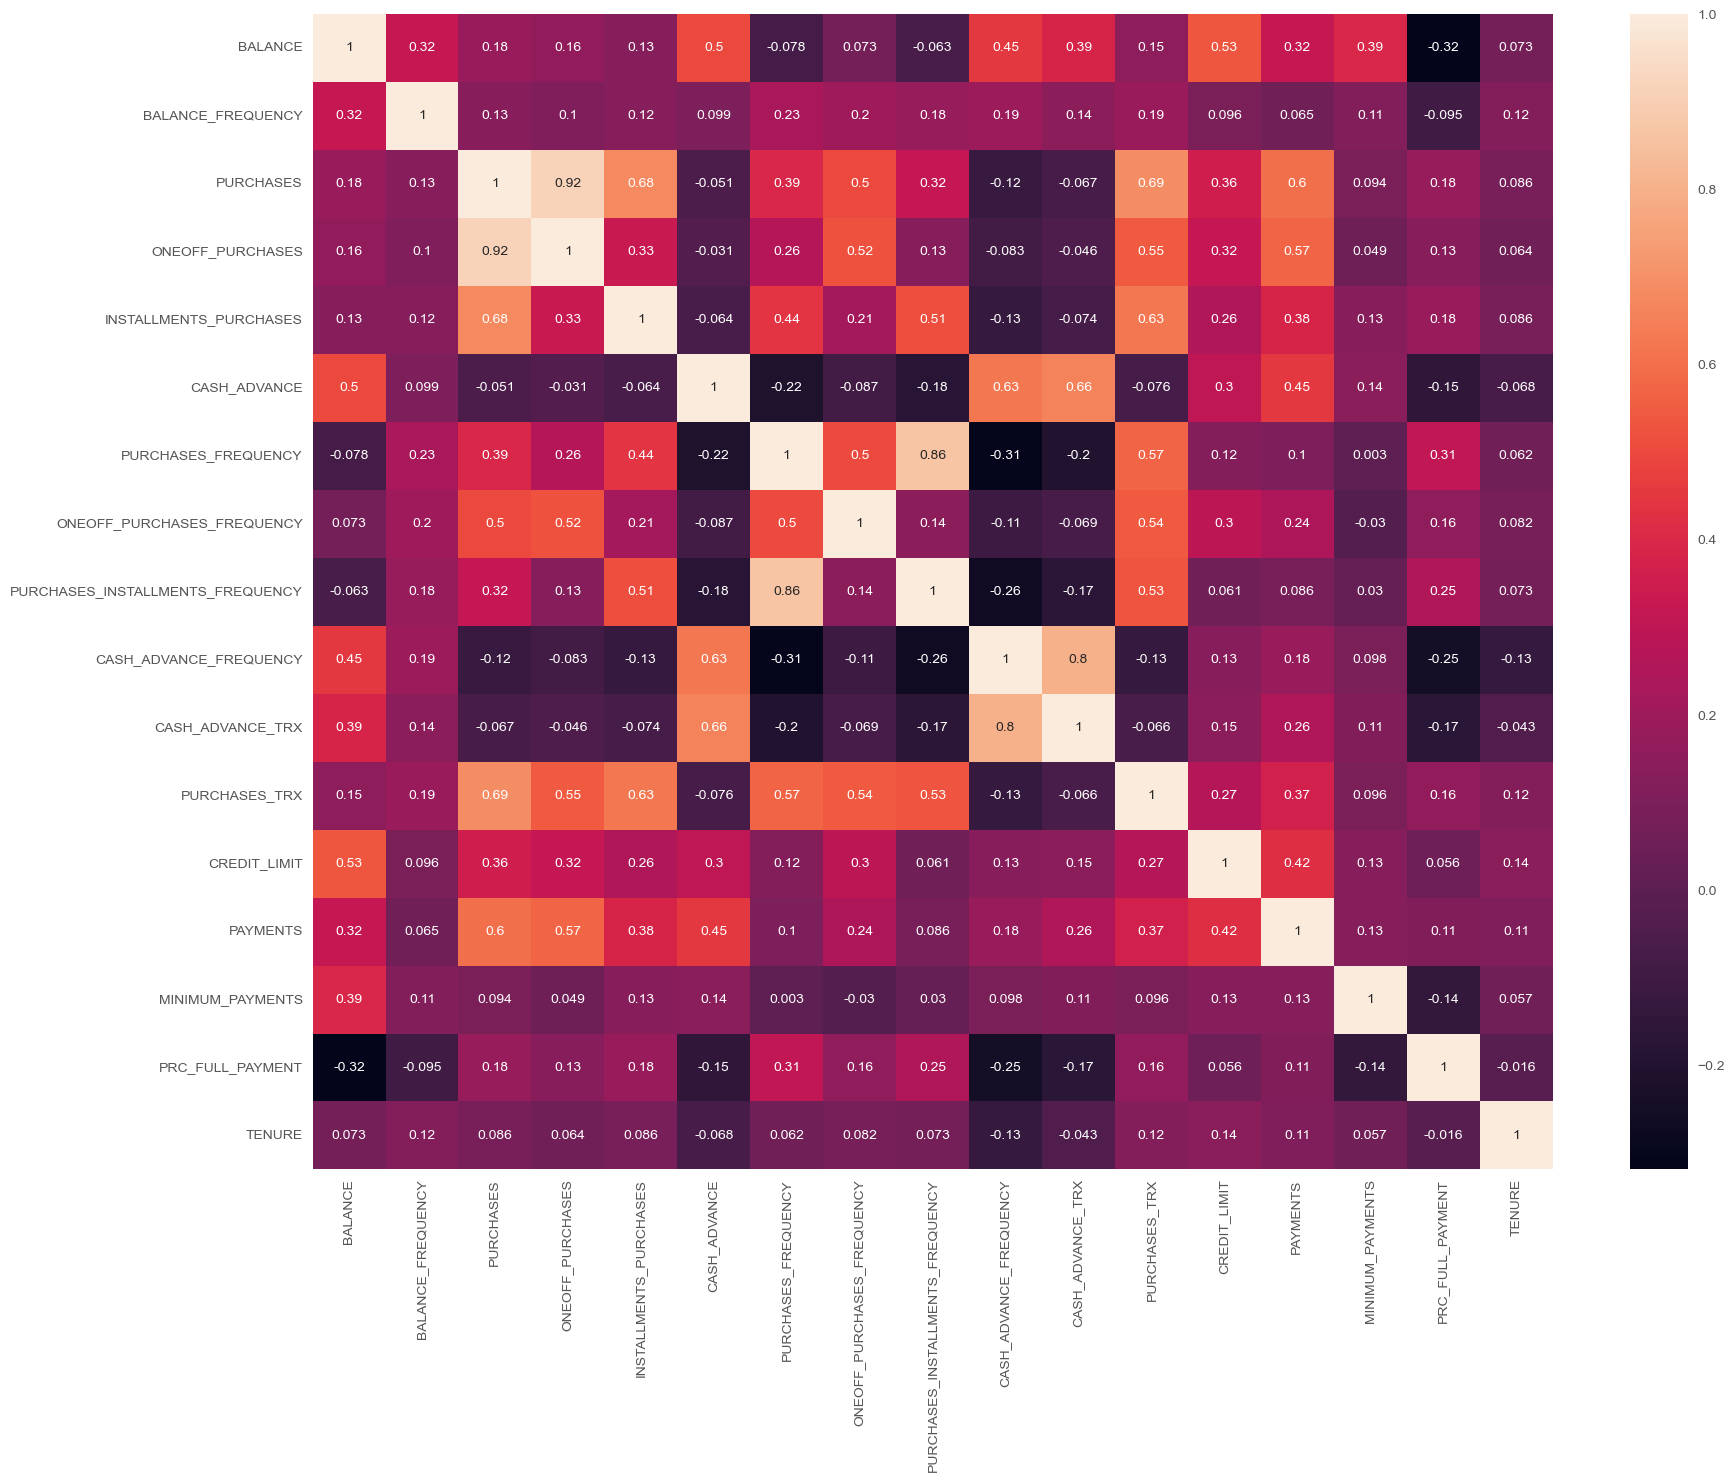

In [21]:
## Menampilkan Heatmap.
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

Variabel yang memiliki korelasi tinggi adalah 
1. PURCHASES dan ONEOFF_PURCHASES dengan nilai korelasi 0,92. 
2. PURCHASES_INSTALLMENTS_FREQUENCY dengan PURCHASES_FREQUENCY dengan nilai korelasi 0,86
3. CASH_ADVANCE_TRX dengan CASH_ADVANCE_FREQUENCY dengan nilai korelasi 0,8.


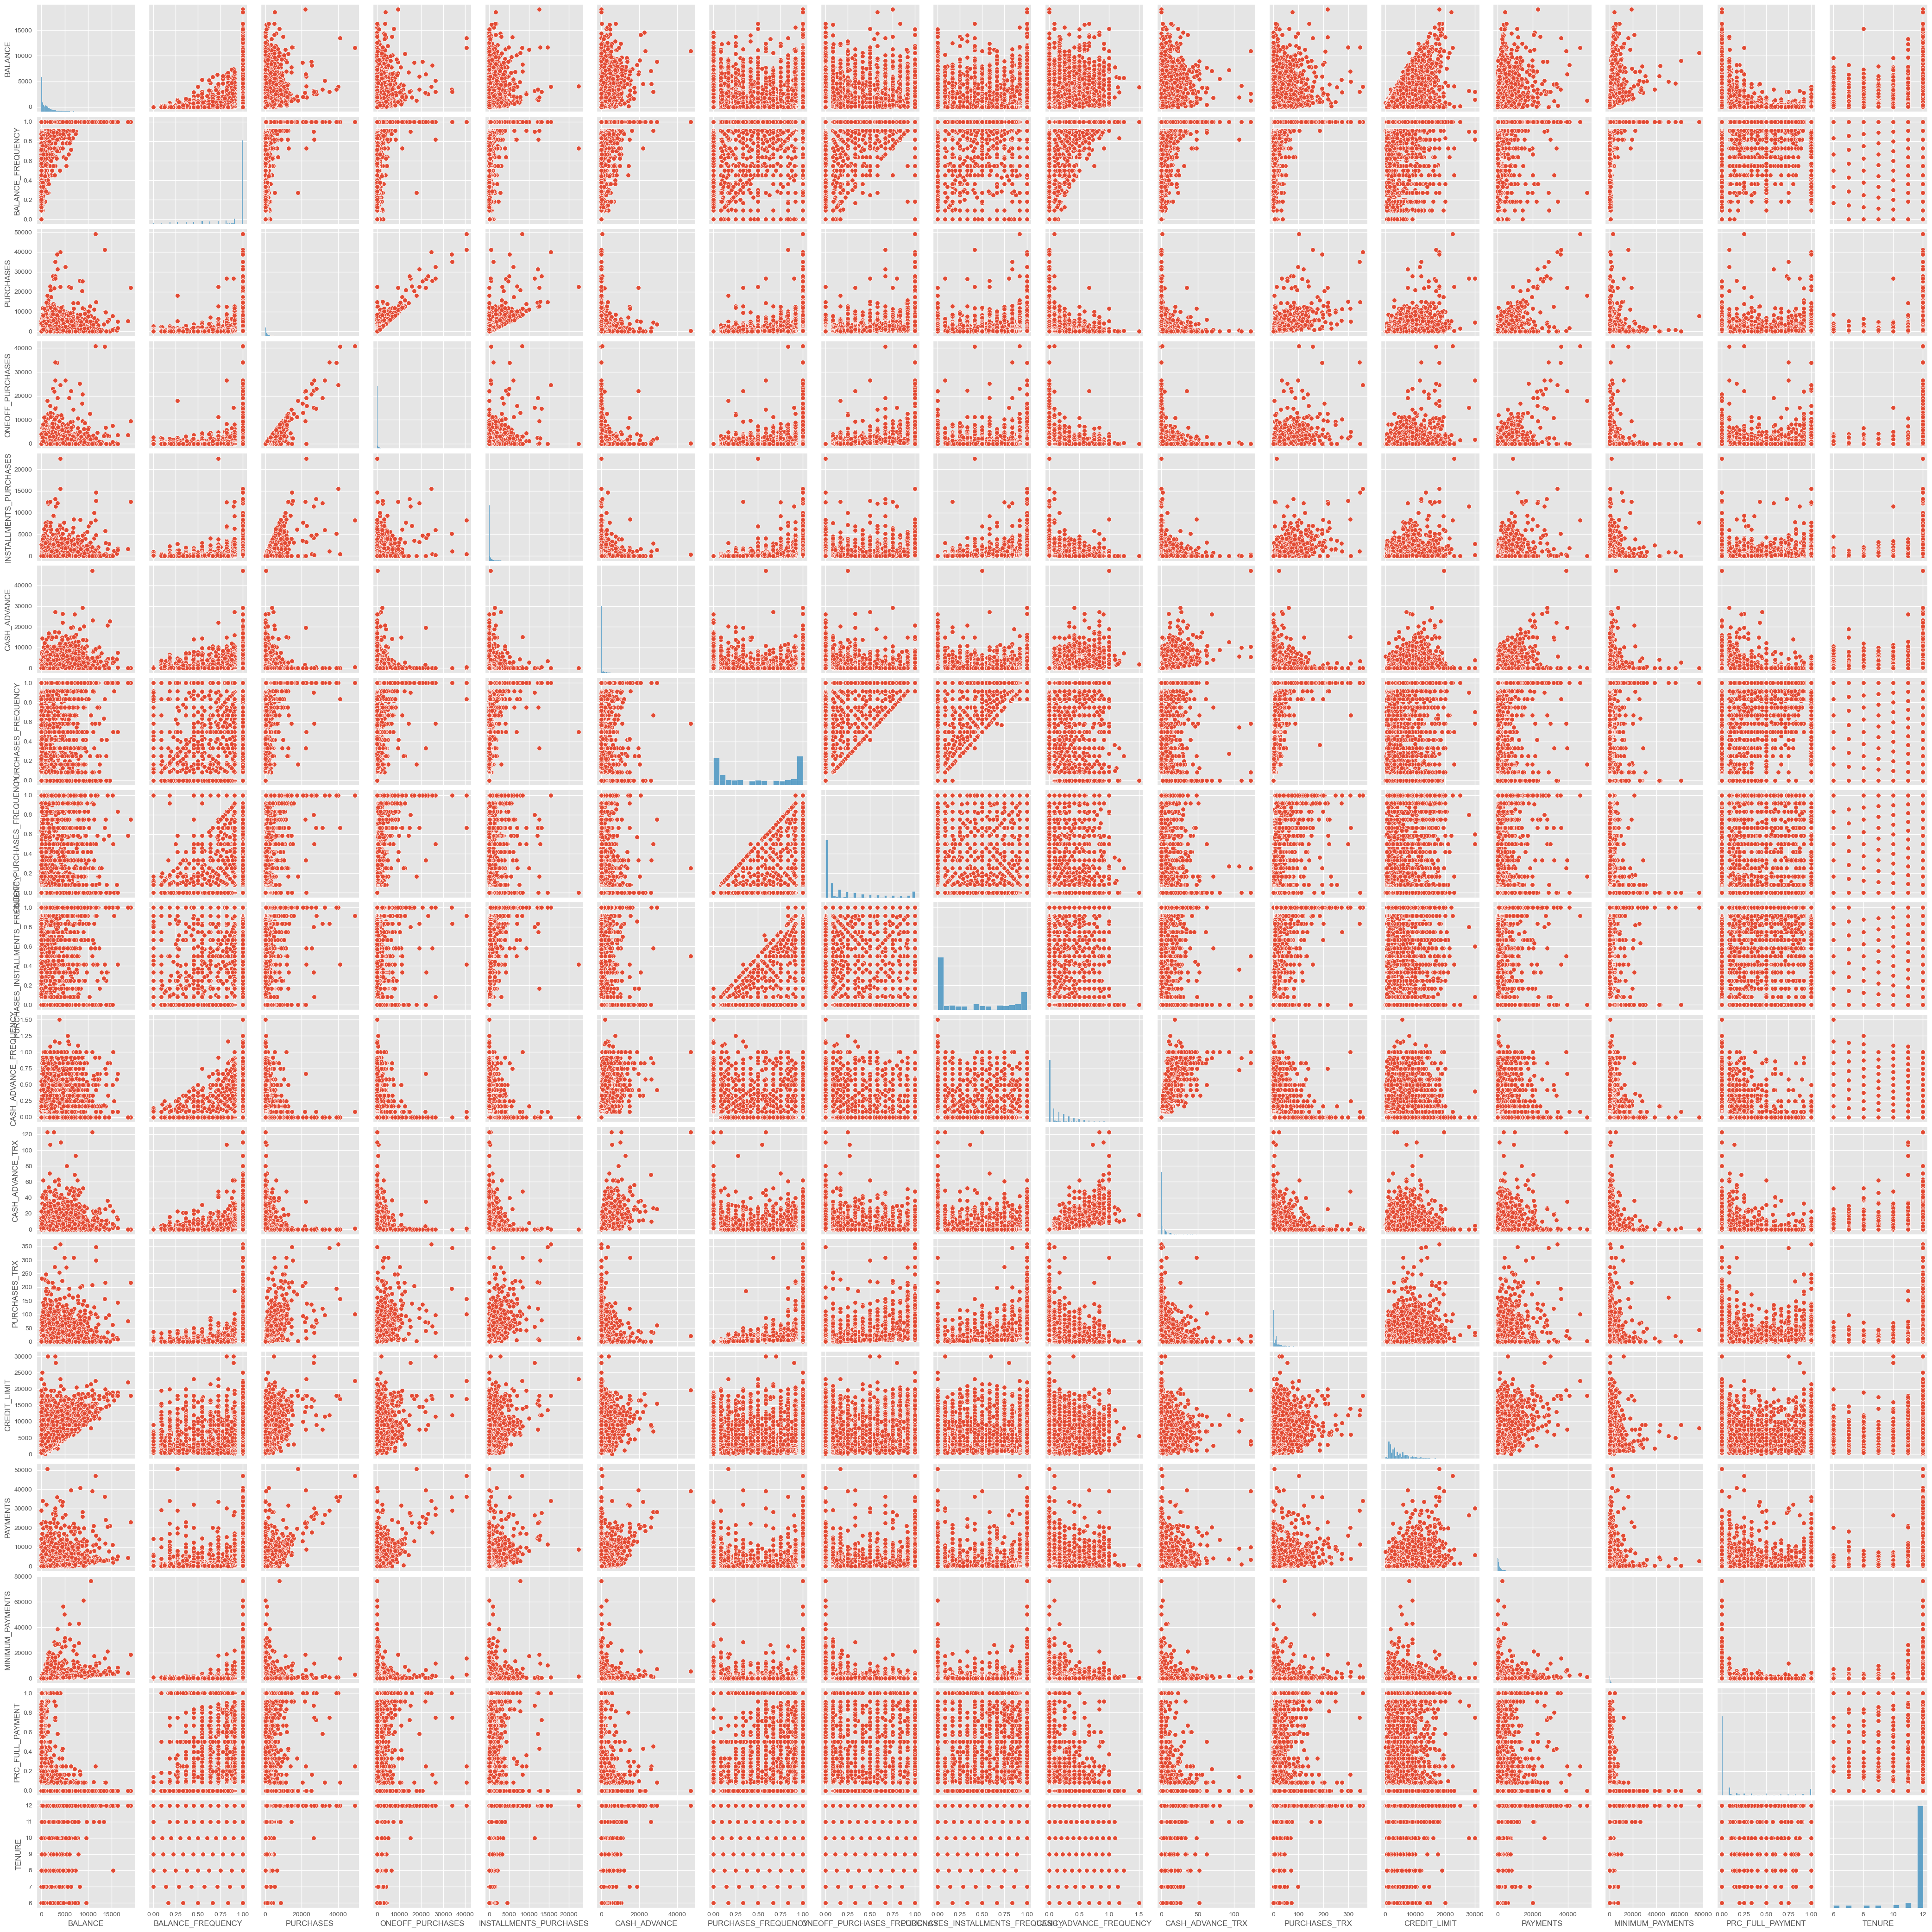

In [22]:
# Menampilkan pairplot setiap vairabel
sns.pairplot(data.loc[:, data.columns])
plt.show()

## Data Preprocessing

### Scaling

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979     -3.109675e-01         -0.525551  0.36068  
1  0.818642      8.931021e-02          0.234227  0.36068  
2 -0.383805     -1.016632e-01         -0.525551  0.36068  
3 -0.598688     -4.390474e-16         -0.525551  0.36068  
4 -0.364368     -2.657913e-01         -0.525551  0.36068

### Hopskins Test

Melakukan uji statistik menggunakan uji Hopkins pada dataset yang telah diproses untuk mengukur kecenderungan pengelompokan data (mengukur sejauh mana klaster ada dalam data yang akan dikelompokkan).

Berikut adalah hipotesis dari uji statistik Hopkins:
- H0: Dataset tidak terdistribusi secara seragam (mengandung klaster yang bermakna).
- H1: Dataset terdistribusi secara seragam (tidak ada klaster yang bermakna).

Kriteria:
- Jika nilai berada antara {0.7, ..., 0.99}, maka terima H0 (memiliki kecenderungan tinggi untuk dikelompokkan).

In [30]:
# Uji Hopskins
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

# Scaling the data
hopkins_value = hopkins(scaled_data)
print(hopkins_value)
if 0.7 < hopkins_value < 0.99:
    print('Data tidak terdistribusi secara seragam')
else:
    print('Data terdistribusi secara seragam')

0.9680400327927261
Data tidak terdistribusi secara seragam


Dari hasil di atas, dapat disimpulkan bahwa dataset memiliki kecenderungan tinggi untuk terbentuk klaster yang bermakna.

### PCA

Principal Component Analysis (PCA) adalah metode yang digunakan dalam unsupervised machine learning tanpa pengawasan (seperti clustering) yang mengurangi dimensi data yang tinggi menjadi dimensi yang lebih kecil sambil mempertahankan sebanyak mungkin informasi. Dengan menggunakan PCA sebelum menerapkan algoritma clustering, dapat mengurangi ukuran dimensi, mengurangi noise data, dan mengurangi biaya komputasi. Dalam notebook ini, PCA akan mengambil komponen utama yang menjelaskan setidaknya 95% variansi dalam data. 

In [31]:
# Mengubah data menjadi array
X = np.asarray(scaled_data)

In [32]:
# Membuat objek PCA
pca = PCA(n_components=0.95, random_state=24)

# Mengubah data menggunakan PCA
X = pca.fit_transform(X)

In [33]:
# menghitung jumlah total variansi
pca.explained_variance_ratio_.sum()

0.9607604695858989

## Model Definition

1. PCA (Principal Component Analysis) adalah salah satu metode yang digunakan dalam analisis data untuk mengurangi dimensi variabel dalam dataset yang kompleks. Tujuannya adalah untuk mengidentifikasi pola atau struktur yang ada dalam dataset dengan memproyeksikan data ke ruang yang lebih rendah berdasarkan komponen utama (principal components) yang paling berkontribusi terhadap variasi dalam data. PCA mencoba untuk mempertahankan bagian penting yang memiliki lebih banyak variasi data dan menghapus bagian yang tidak penting dengan variasi yang lebih sedikit.

2. K-Means adalah salah satu algoritma unsupervised learning yang digunakan dalam analisis data dan pengelompokan data. Algoritma ini bertujuan untuk membagi data menjadi beberapa kelompok (cluster) berdasarkan kesamaan karakteristiknya.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah salah satu algoritma unsupervised learning yang digunakan dalam pengelompokan data berdasarkan kerapatan. Algoritma ini mengidentifikasi kelompok data yang memiliki kerapatan yang tinggi dan memisahkan data yang memiliki kerapatan rendah atau dianggap sebagai "noise".

4. Hierarchical Clustering adalah salah satu metode unsupervised learning yang digunakan dalam analisis data untuk mengelompokkan objek berdasarkan kesamaan atau perbedaan mereka. Metode ini membangun struktur hirarki berdasarkan kemiripan antara objek yang ada dalam dataset. Agglomerative (Bottom-Up): Dimulai dengan setiap objek sebagai kelompok terpisah, kemudian secara bertahap menggabungkan kelompok-kelompok yang paling mirip berdasarkan jarak atau kesamaan. Proses ini berlanjut hingga semua objek tergabung dalam satu kelompok.

## Model Training

### K-Means

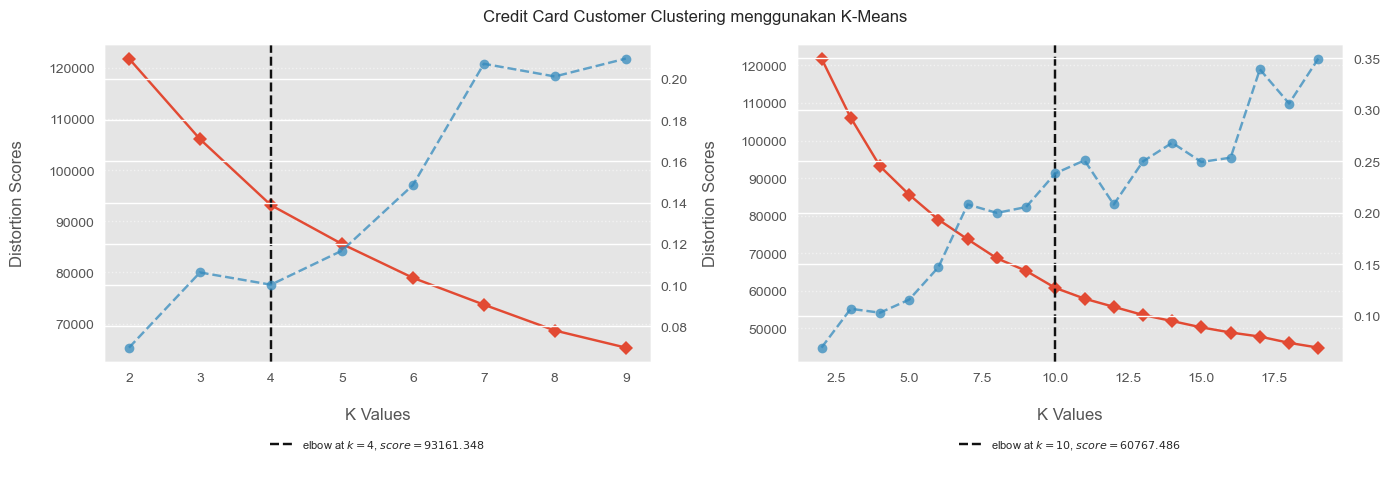

In [34]:
# Membuat objek K-means
model = KMeans(random_state=32)

# Membuat subplot dan mengatur ukuran figur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Membuat fungsi elbow
def elbow(k, ax):
    # Membuat objek KElbowVisualizer
    visualizer = KElbowVisualizer(model, k=(2,k), metric='distortion', ax=ax)

    # Melakukan fit pada data
    visualizer.fit(X)

    # Menambahkan grid pada sumbu y dan sumbu x
    visualizer.ax.grid(axis='y', alpha=0.5, linestyle='dotted')
    visualizer.ax.grid(axis='x', alpha=0)

    # Menambahkan legenda pada plot
    visualizer.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    
    # Mengatur label sumbu x dan sumbu y
    visualizer.ax.set_xlabel('\nK Values')
    visualizer.ax.set_ylabel('Distortion Scores\n')

# Memanggil fungsi elbow
elbow(10, ax1)
elbow(20, ax2)

# Menampilkan plot elbow
plt.suptitle('Credit Card Customer Clustering menggunakan K-Means')
plt.tight_layout()
plt.show()

Berdasarkan hasil dari metode elbow di atas dapat disimpulkan bahwa jumlah clustering terbaik untuk algoritma K-Means adalah 4 cluster dan 10 cluster. 

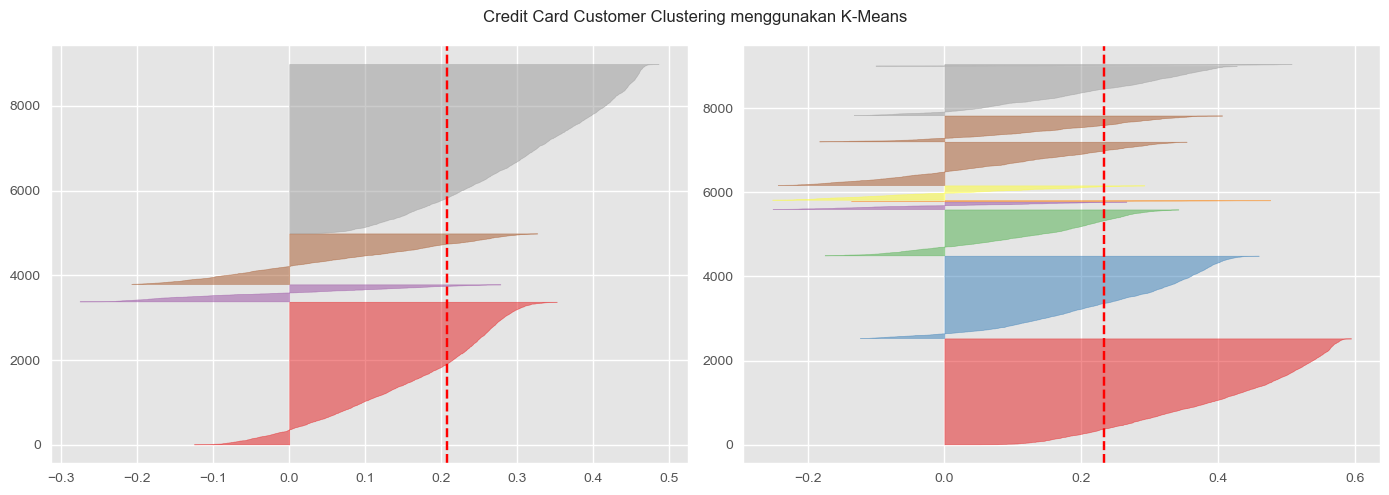

In [35]:
# Membuat subplot dan mengatur ukuran figur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Membuat fungsi kmeans
def kmeans(n, ax):
    # Membuat objek KMeans
    kmeans = KMeans(n_clusters=n, random_state=32)

    # Membuat objek SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, ax=ax)

    # Melakukan fit pada data
    visualizer.fit(X)

# Memanggil fungsi kmeans
kmeans(4, ax1)
kmeans(10, ax2)

# Menampilkan plot silhouette
plt.suptitle('Credit Card Customer Clustering menggunakan K-Means')
plt.tight_layout()
plt.show()

Dari hasil plot silhouette diatas, nilai silhouette masing-masing cluster berada di atas rata-rata yang menunjukkan semua cluster sudah optimal.

In [36]:
for n_clusters in range(2, 21):
    # Inisialisasi dan melatih model clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=32)
    kmeans.fit(X)

    # Memprediksi label klaster untuk setiap sampel
    cluster_labels = kmeans.predict(X)

    # Menghitung silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Menampilkan hasil
    print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg}")

Jumlah klaster: 2, Silhouette Score: 0.21802113182156124
Jumlah klaster: 3, Silhouette Score: 0.25352794474767987
Jumlah klaster: 4, Silhouette Score: 0.2081410056855582
Jumlah klaster: 5, Silhouette Score: 0.20477991415817426
Jumlah klaster: 6, Silhouette Score: 0.2144670918368501
Jumlah klaster: 7, Silhouette Score: 0.22110114532518768
Jumlah klaster: 8, Silhouette Score: 0.23409952623459626
Jumlah klaster: 9, Silhouette Score: 0.22848134279458496
Jumlah klaster: 10, Silhouette Score: 0.23345822268351302
Jumlah klaster: 11, Silhouette Score: 0.23310718385221038
Jumlah klaster: 12, Silhouette Score: 0.23374730424663198
Jumlah klaster: 13, Silhouette Score: 0.23225929728943998
Jumlah klaster: 14, Silhouette Score: 0.2096875235169937
Jumlah klaster: 15, Silhouette Score: 0.2119772018766535
Jumlah klaster: 16, Silhouette Score: 0.21367263964138702
Jumlah klaster: 17, Silhouette Score: 0.2073105575523569
Jumlah klaster: 18, Silhouette Score: 0.2206538210868357
Jumlah klaster: 19, Silhouet

Berdasarkan hasil dari metode elbow di atas dapat disimpulkan bahwa jumlah cluster terbaik untuk algoritma K-Means adalah 10 cluster.

In [37]:
# Membuat objek Kmeans
kmeans = KMeans(n_clusters=10, random_state=32, max_iter=500)

# Melakukan proses klasterisasi
y_kmeans = kmeans.fit_predict(X)

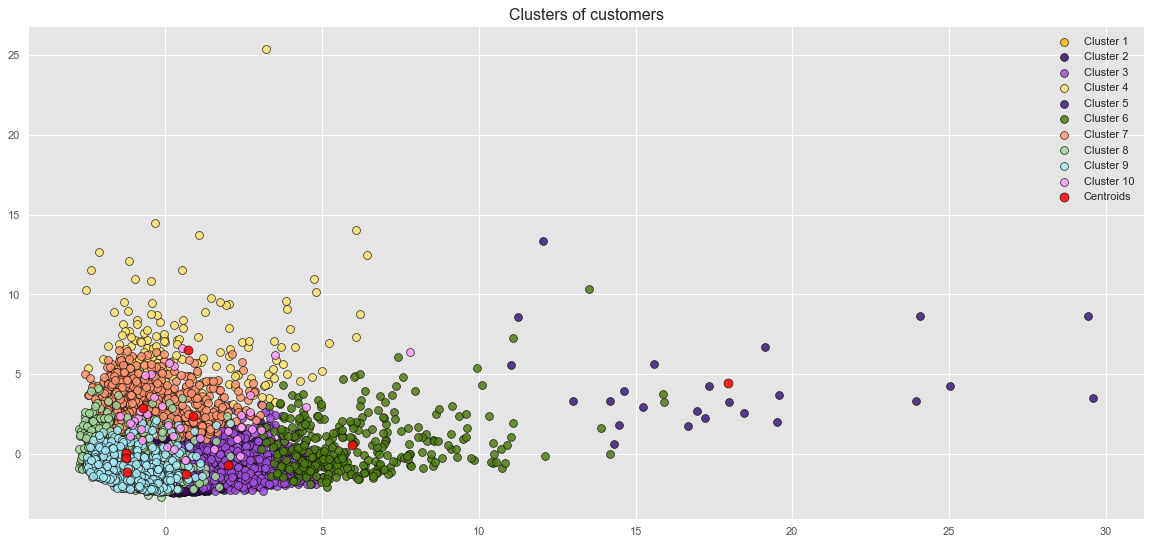

In [38]:
# Mengatur warna klaster dan label  
cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270', '#3A1A7B', '#4F7D13', '#FF956F', '#A4D69D', '#A6EBF7', '#FF9CFF']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10','Centroids']

# Mengatur gaya scatter plot
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)

# Mengatur ukuran figur
plt.figure(figsize=(18, 8), dpi=80)

# Melakukan scatter plot untuk setiap klaster
y_kmeans_labels = list(set(y_kmeans.tolist()))
for i in y_kmeans_labels:
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)

# Menambahkan pusat klaster (centroids)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 65, c='red', label=labels[10], **scatter_style)

# Menambahkan judul dan legenda
plt.title('Clusters of customers')
plt.legend()

# Menampilkan scatter plot
plt.show()

Dari hasil plot diatas, dapat dilihat berdasarkan 10 cluster tersebut sebagian besar titik data terletak di pojok kiri bawah plot, dan sebagian besar cluster saling tumpang tindih yang menyebabkan cluster sulit untuk dilihat

### DBSCAN

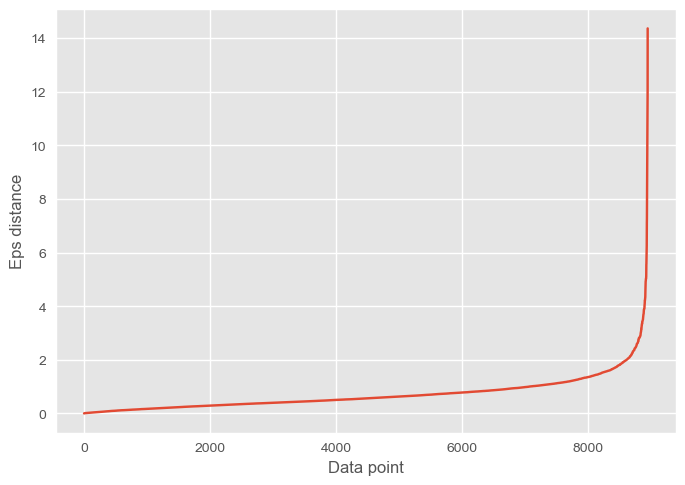

In [39]:
# Membuat objek NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=2)

# Melakukan fit pada data
nbrs=neighbors.fit(X)

# Menghitung jarak Eps
distances, indices=nbrs.kneighbors(X)
distances=np.sort(distances, axis = 0)

# Memplotting jarak Eps 
plt.plot(np.arange(len(X)), distances[:, 2-1])
plt.xlabel('Data point')
plt.ylabel('Eps distance')
plt.show()

Berdasarkan plot tersebut, lengkung maksimum dari kurva berada sekitar 2.5, oleh karena itu kami memilih nilai Eps kami sebagai 2.5.

In [40]:
# Membuat objek DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=4)

# Melakukan proses klasterisasi
y_dbscan = dbscan.fit_predict(X)

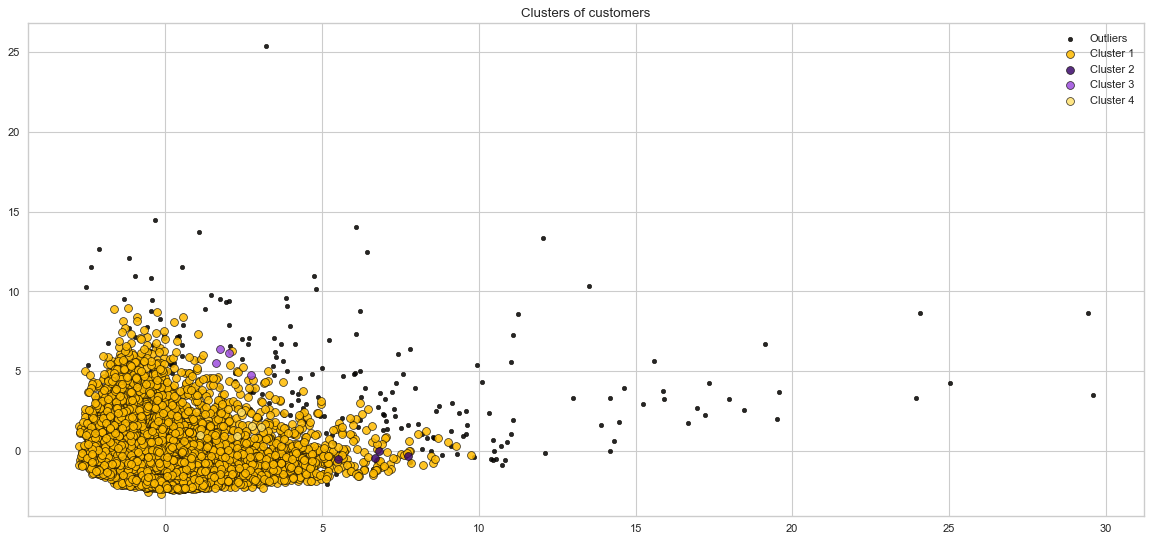

In [54]:
# Warna dan Label
cluster_colors = ['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270', 'black']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Outliers']

# Gaya scatter plot
scatter_style = dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)

# Membuat figure
plt.figure(figsize=(18, 8), dpi=80)

# Menggambar scatter plot untuk klaster
for i in np.unique(y_dbscan):
    if i == -1:
        # Menggambar scatter plot untuk outlier
        plt.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1], s=15, c=cluster_colors[4], label=labels[4], **scatter_style)
    else:
        # Menggambar scatter plot untuk klaster
        plt.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)

# Menampilkan judul dan legenda
plt.title('Clusters of customers')
plt.legend()

# Menampilkan scatter plot
plt.show()

 Seperti yang dapat dilihat di atas, model DBSCAN menempatkan sebagian besar sampel ke dalam 1 cluster, dan memberi label yang lain sebagai noise. Hasil model DBSCAN ini belum memuaskan dikarenakan masih terdapat outlier atau noise yang berdampak buruk pada performa DBSCAN yang bercampur dengan cluster 1

### Hierarchical Clustering (Agglomerative)

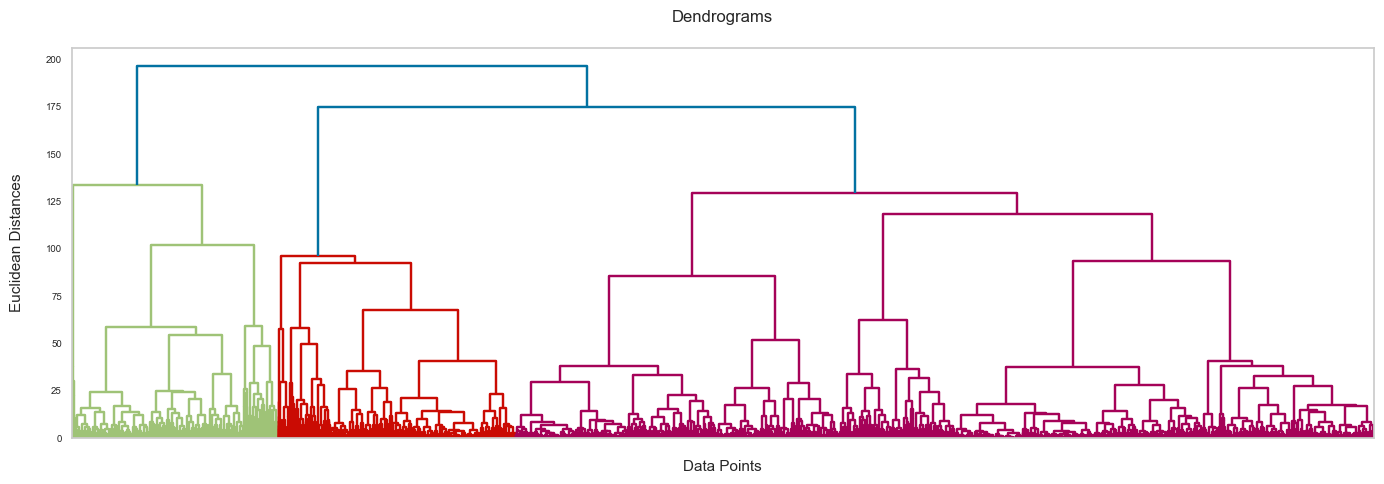

In [53]:
# Mengatur ukuran figur
plt.figure(figsize=(14, 5))

# Membuat plot dendrogram
dend=shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'))

# Mengatur label
plt.xlabel('\nData Points')
plt.ylabel('Euclidean Distances\n')
plt.tick_params(labelbottom=False)

# Mengatur grid dan ukuran label
plt.grid(axis='both', alpha=0)
plt.tick_params(labelsize=7)

# Menambahkan judul dan menyesuaikan tata letak
plt.title('Dendrograms\n')
plt.tight_layout()

# Menampilkan plot dendrogram
plt.show();

Dengan menarik garis mendatar pada garis vertikal dengan jarak terbesar, maka kita bisa menghitung jumlah cluster yang ada di garis (mendatar) tersebut. Jadi jumlah kluster yang terbentuk adalah 3 cluster

In [57]:
# Membuat objek Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Melakukan proses klasterisasi
y_agg_cluster = agg_cluster.fit_predict(X)

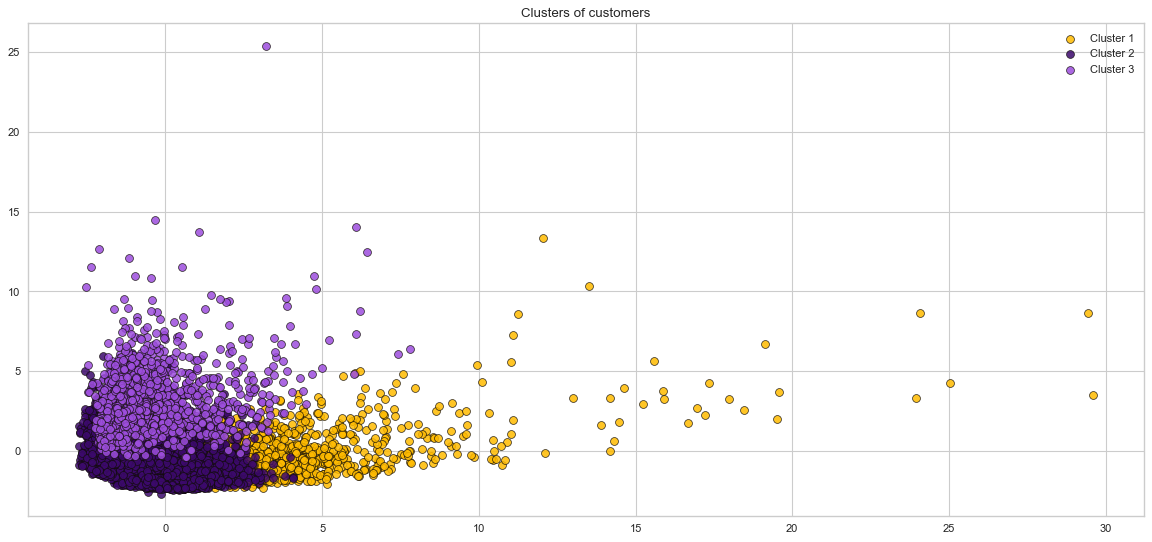

In [49]:
# Mengatur warna klaster dan label
cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Mengatur gaya scatter plot
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)

# Mengatur ukuran figur
plt.figure(figsize=(18, 8), dpi=80)

# Melakukan scatter plot untuk setiap klaster
y_agg_labels = list(set(y_agg_cluster.tolist()))
for i in y_agg_labels:
    plt.scatter(X[y_agg_cluster==i, 0], X[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)

# Menambahkan judul dan legenda
plt.title('Clusters of customers')
plt.legend()

# Menampilkan scatter plot
plt.show();

Dari hasil plot diatas, dapat dilihat terlihat ada 3 cluster yang terbentuk. Model Hierarchical Clustering sebagian besar menganggap outlier sebagai bagian dari kluster 1.

## Model Evaluation & Inference

In [43]:
def printEvaluate(db, ss, ch):
    print('Evaluate Clustering Quality')
    print('Davies-Bouldin Index: ', db)
    print('Silhouette Score: ', ss)
    print('Calinski Harabasz Index: ', ch)

### K-Means

In [44]:
db_kmeans = davies_bouldin_score(X, y_kmeans)
ss_kmeans = silhouette_score(X, y_kmeans) 
ch_kmeans = calinski_harabasz_score(X, y_kmeans)

printEvaluate(db_kmeans, ss_kmeans, ch_kmeans)

Evaluate Clustering Quality
Davies-Bouldin Index:  1.298182165757683
Silhouette Score:  0.23345822268351296
Calinski Harabasz Index:  1396.1875112661846


### DBSCAN

In [45]:
db_dbscan = davies_bouldin_score(X, y_dbscan)
ss_dbscan = silhouette_score(X, y_dbscan)
ch_dbscan = calinski_harabasz_score(X, y_dbscan)

printEvaluate(db_dbscan, ss_dbscan, ch_dbscan)

Evaluate Clustering Quality
Davies-Bouldin Index:  1.51054183741245
Silhouette Score:  0.42142211627024306
Calinski Harabasz Index:  247.27062132035016


### Hierarchical Clustering (Agglomerative)

In [46]:
db_agg = davies_bouldin_score(X, y_agg_cluster)
ss_agg = silhouette_score(X, y_agg_cluster)
ch_agg = calinski_harabasz_score(X, y_agg_cluster)

printEvaluate(db_agg, ss_agg, ch_agg)

Evaluate Clustering Quality
Davies-Bouldin Index:  1.7155298920814246
Silhouette Score:  0.20411277313997678
Calinski Harabasz Index:  1383.1000827141097


## Perbandingan Model

In [42]:
# Membuat DataFrame compare
compare = pd.DataFrame({'Model': ['K-Means', 'DBSCAN', 'Hierarchical Clustering'], 
                        'Davies-Bouldin Index': [db_kmeans, db_dbscan, db_agg],
                        'Silhouette Score': [ss_kmeans, ss_dbscan, ss_agg],
                        'Calinski-Harabasz Index': [ch_kmeans, ch_dbscan, ch_agg]})

# Mencetak tabel perbandingan kualitas clustering
print('Model Accuracy Comparison')
compare.sort_values(by='Model', ascending=False).style.background_gradient(cmap='inferno_r').hide_index()

Model Accuracy Comparison


- Davies-Bouldin Index (DBI): DBI mengukur kualitas klastering dengan mempertimbangkan jarak antara pusat klaster dan jarak antara klaster yang berbeda. Semakin rendah nilai DBI, semakin baik klasteringnya. Nilai DBI terendah adalah 0, yang menunjukkan klaster yang sangat terpisah dan terdefinisi dengan baik.
- Silhouette Score: Silhouette Score mengukur sejauh mana setiap sampel dalam klaster cocok dengan klasternya sendiri dibandingkan dengan klaster tetangga terdekatnya. Nilai Silhouette Score berkisar dari -1 hingga 1. Nilai positif yang lebih tinggi menunjukkan kualitas klastering yang lebih baik, sedangkan nilai negatif menunjukkan bahwa sampel mungkin ditempatkan di klaster yang salah.
- Calinski-Harabasz Index (CHI): CHI menggunakan perbandingan antara variasi dalam klaster dan variasi antara klaster untuk mengukur kualitas klastering. Nilai CHI yang lebih tinggi menunjukkan klaster yang lebih terpisah dan terdefinisi dengan baik. CHI juga dikenal sebagai Variance Ratio Criterion.

## Kesimpulan

Tabel di atas menunjukkan bahwa algoritma K-Means memiliki nilai Davies-Bouldin index yang paling rendah dibandingkan dua algoritma lainnya, sehingga dapat disimpulkan bahwa K-Means memiliki kualitas klastering yang lebih baik dibandingkan dua algoritma lainnya. Namun, berdasarkan nilai silhouette score, K-Means memiliki nilai silhouette score tertinggi kedua (ada beberapa klaster yang tumpang tindih yang terbentuk menggunakan algoritma ini).

Selanjutnya, klastering menggunakan algoritma hierarchical clustering memiliki nilai Davies-Bouldin index paling tinggi, dan nilai silhouette score sedikit lebih rendah dibandingkan dengan K-Means. Terakhir, klastering menggunakan DBSCAN memiliki nilai Davies-Bouldin index tertinggi kedua dan memiliki nilai silhouette score yang terbaik dibandingkan dengan algoritma lainnya.

Dari hasil Calinski-Harabasz index, dapat dilihat bahwa K-Means memiliki nilai indeks tertinggi dibandingkan dengan algoritma lainnya. Hal ini menunjukkan bahwa K-Means memberikan performa yang lebih baik dan lebih padat dibandingkan dengan algoritma lainnya.

Dapat disimpulkan bahwa K-Means memiliki kualitas klastering terbaik dari ketiga algoritma tersebut karena memiliki nilai Davies-Bouldin index yang paling rendah dan klaster yang tumpang tindih yang sedikit lebih baik dibandingkan dengan hierarchical clustering.

Tetapi pada real case, jumlah cluster ditentukan dengan bergantung pada kebutuhan. Misal dalam strategi pemasaran, jumlah 10 cluster mungkin terlalu kompleks. Jadi disini kami juga akan mencoba menggunakan 4 cluster.

In [66]:
# Membuat objek Kmeans
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)

# Melakukan proses klasterisasi
y_kmeans = kmeans.fit_predict(X)

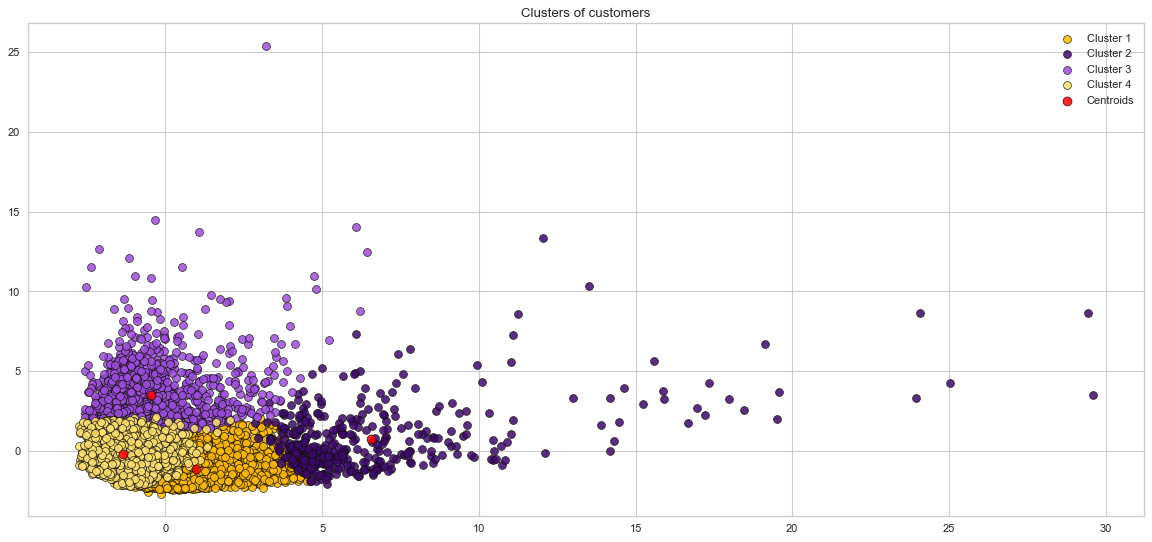

In [67]:
# Mengatur warna klaster dan label  
cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270', '#3A1A7B', '#4F7D13', '#FF956F', '#A4D69D', '#A6EBF7', '#FF9CFF']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10','Centroids']

# Mengatur gaya scatter plot
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)

# Mengatur ukuran figur
plt.figure(figsize=(18, 8), dpi=80)

# Melakukan scatter plot untuk setiap klaster
y_kmeans_labels = list(set(y_kmeans.tolist()))
for i in y_kmeans_labels:
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)

# Menambahkan pusat klaster (centroids)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 65, c='red', label=labels[10], **scatter_style)

# Menambahkan judul dan legenda
plt.title('Clusters of customers')
plt.legend()

# Menampilkan scatter plot
plt.show()

In [68]:
# Menambahkan prediksi K-Means ke dalam Data Frame
data['cluster_result'] = y_kmeans+1
data['cluster_result'] = 'Cluster '+ data['cluster_result'].astype(str)

In [69]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE cluster_result  
0   201.802084        139.509787          0.000000      12      Cluster 4  
1  4103.032597       1072.340217          0.222222      12      Cluster 3  
2   622.066742        627.284787          0.000000      12      Cluster 1  
3     0.000000        864.206542          0.000000      12      Cluster 4  
4   678.334763        244.791237          0.000000      12      Cluster 4

In [70]:
# --- Calculationg Overall Mean from Current Data Frame ---
data_profile_overall = pd.DataFrame()
data_profile_overall['Overall'] = data.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters --- 
data_cluster_summary = data.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
data_cluster_summary = data_cluster_summary[data_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
print('Summarize of Each Clusters')
data_profile = data_cluster_summary.join(data_profile_overall).reset_index()
data_profile.style.background_gradient(cmap='YlOrBr').hide_index()

Summarize of Each Clusters


Berdasarkan tabel di atas, dapat disimpulkan bahwa setiap Cluster memiliki karakteristik sebagai berikut:

- Cluster 1: Pengguna Cicilan - Menggunakan kartu kredit khusus untuk cicilan, transaksi besar dengan cicilan, frekuensi dan jumlah pencairan tunai kecil. Jarang melakukan pembayaran.

- Cluster 2: Pengguna Pembayar Penuh - Pengguna aktif kartu kredit bank, sering mengubah saldo, jumlah saldo tinggi, frekuensi transaksi dan cicilan tinggi. Skor kredit baik.

- Cluster 3: Pengguna Penarikan Tunai - Saldo tinggi, frekuensi perubahan saldo tinggi, sering melakukan pencairan tunai. Jarang melakukan cicilan atau pembelian satu kali.

- Cluster 4: Pengguna Pemula/Mahasiswa - Jarang menggunakan kartu kredit untuk transaksi dan cicilan, saldo kecil, frekuensi perubahan saldo rendah, batas kredit rendah. Digunakan terutama untuk penarikan tunai.

Klaster 1 adalah pengguna cicilan dengan transaksi besar, Klaster 2 adalah pengguna pengguna aktif dengan saldo tinggi, Klaster 3 adalah pengguna yang sering melakukan penarikan tunai, dan Klaster 4 adalah pengguna pemula/mahasiswa dengan penggunaan kartu kredit terbatas.

Berdasarkan hasil di atas, berikut adalah beberapa saran untuk strategi pemasaran:

- Cluster 2: Fokus pada pemasaran kepada pelanggan yang aktif menggunakan kartu kredit. Tawarkan manfaat dan reward untuk menggunakan kartu kredit lebih sering.

- Cluster 1: Pemasaran khusus untuk kartu kredit cicilan. Tawarkan program cicilan dengan bunga rendah atau 0% untuk menarik pelanggan dalam klaster ini.

- Cluster 4: Tawarkan kartu kredit khusus untuk pemula atau mahasiswa. Sediakan fitur seperti pembebasan biaya, reward untuk pembayaran tepat waktu, dan kesempatan upgrade ke produk yang lebih baik.

- Cluster 3: Tawarkan kartu kredit khusus dengan manfaat penarikan tunai, seperti biaya rendah atau tidak ada, suku bunga rendah, dan masa jabatan yang lebih lama. Juga pertimbangkan program bayar nanti atau pinjaman pribadi.

Dengan menerapkan strategi pemasaran yang tepat untuk setiap cluster, bank dapat meningkatkan efektivitas pemasaran dan menarik lebih banyak pelanggan untuk menggunakan kartu kredit mereka.